In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

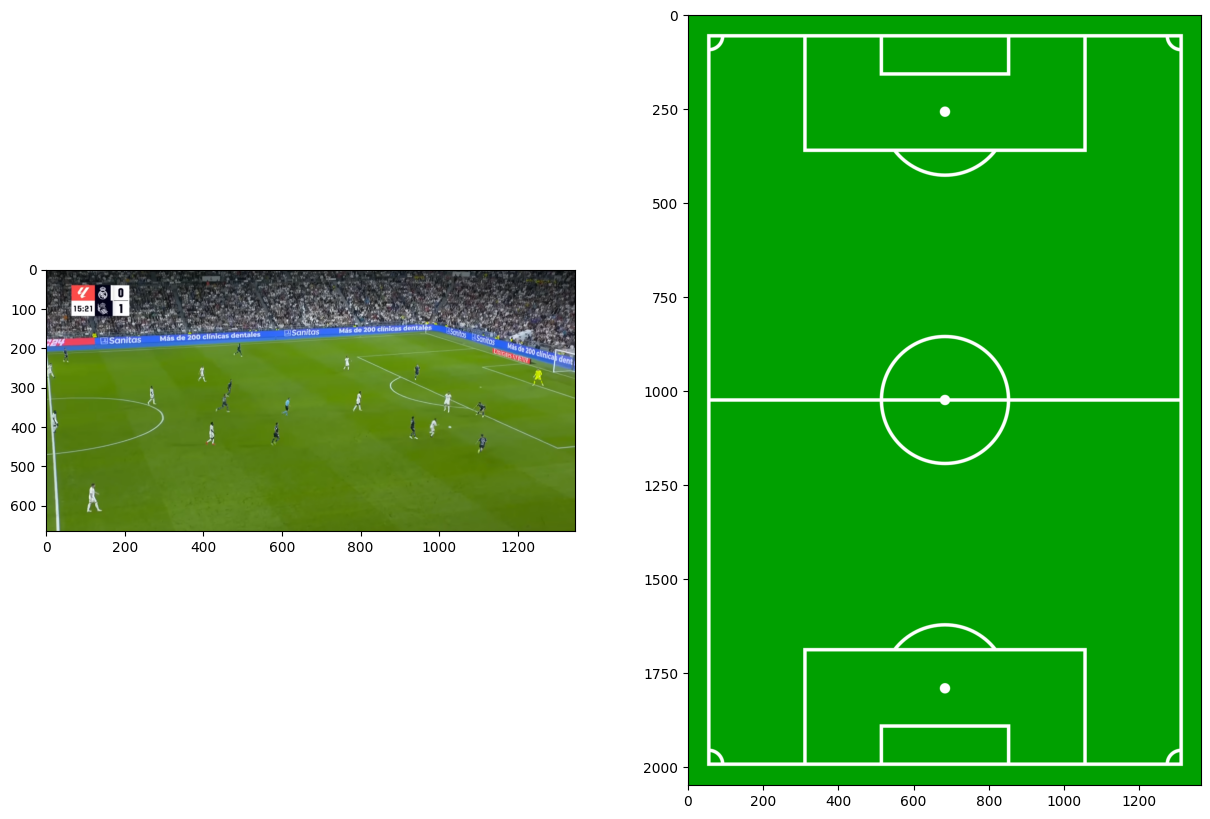

In [2]:
img = cv2.cvtColor(cv2.imread('field.png'), cv2.COLOR_BGR2RGB)
field = cv2.cvtColor(cv2.imread('field_2d.jpg'), cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(img)
ax[1].imshow(field)

## Select a few points

In [3]:
P1 = (1300, 455)
P1_2D = (1050, 360)

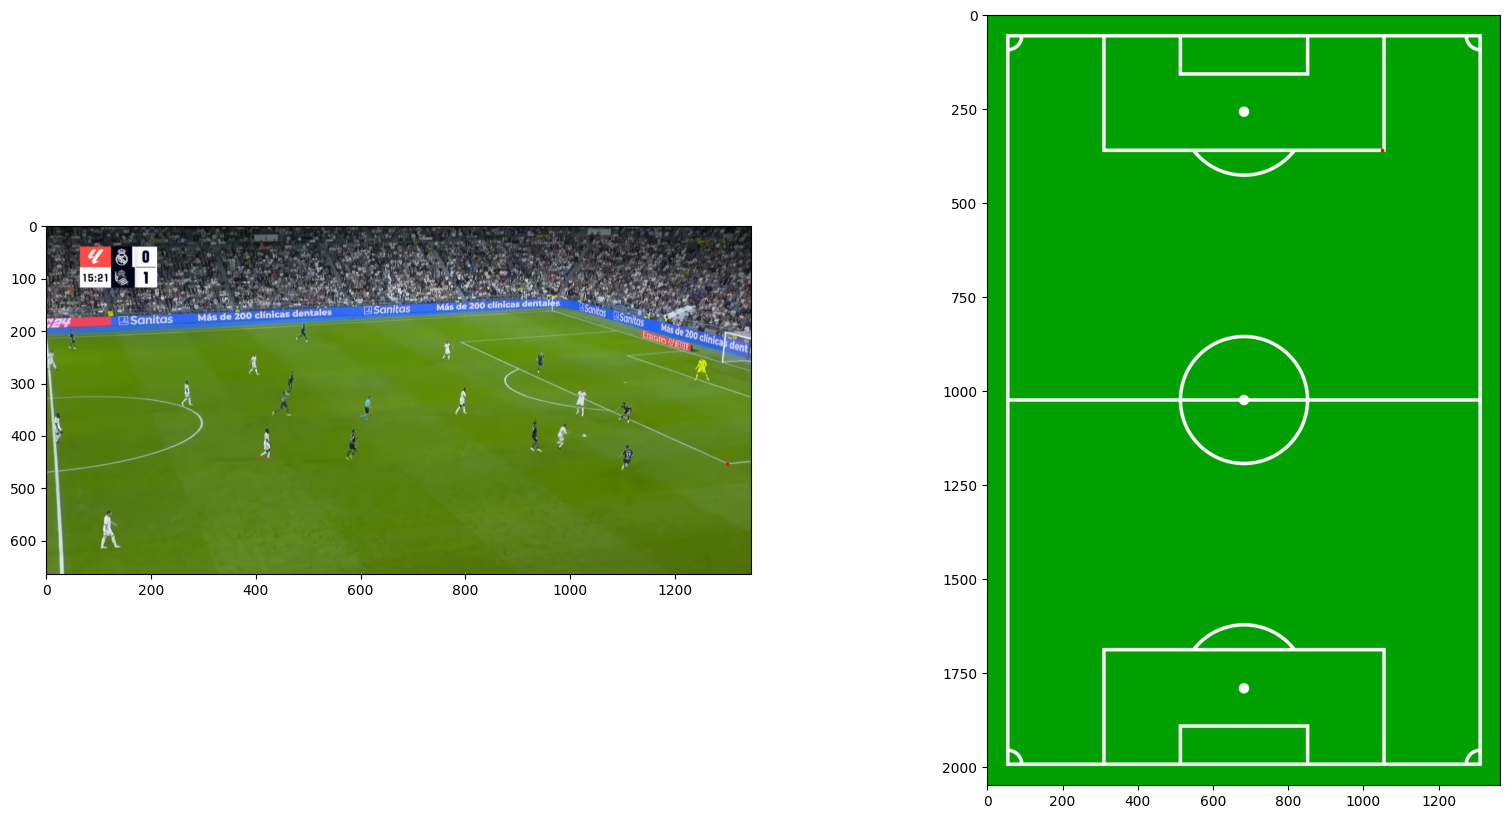

In [4]:
corner2 = img.copy()
corner2 = cv2.circle(corner2, P1, 3, (255, 0, 0), -1)

corner2_2d = field.copy()
corner2_2d = cv2.circle(corner2_2d,P1_2D,  5, (255, 0, 0), -1)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(corner2)
ax[1].imshow(corner2_2d)

In [5]:
P2 = (1090,200)
P2_2D = (310, 60)

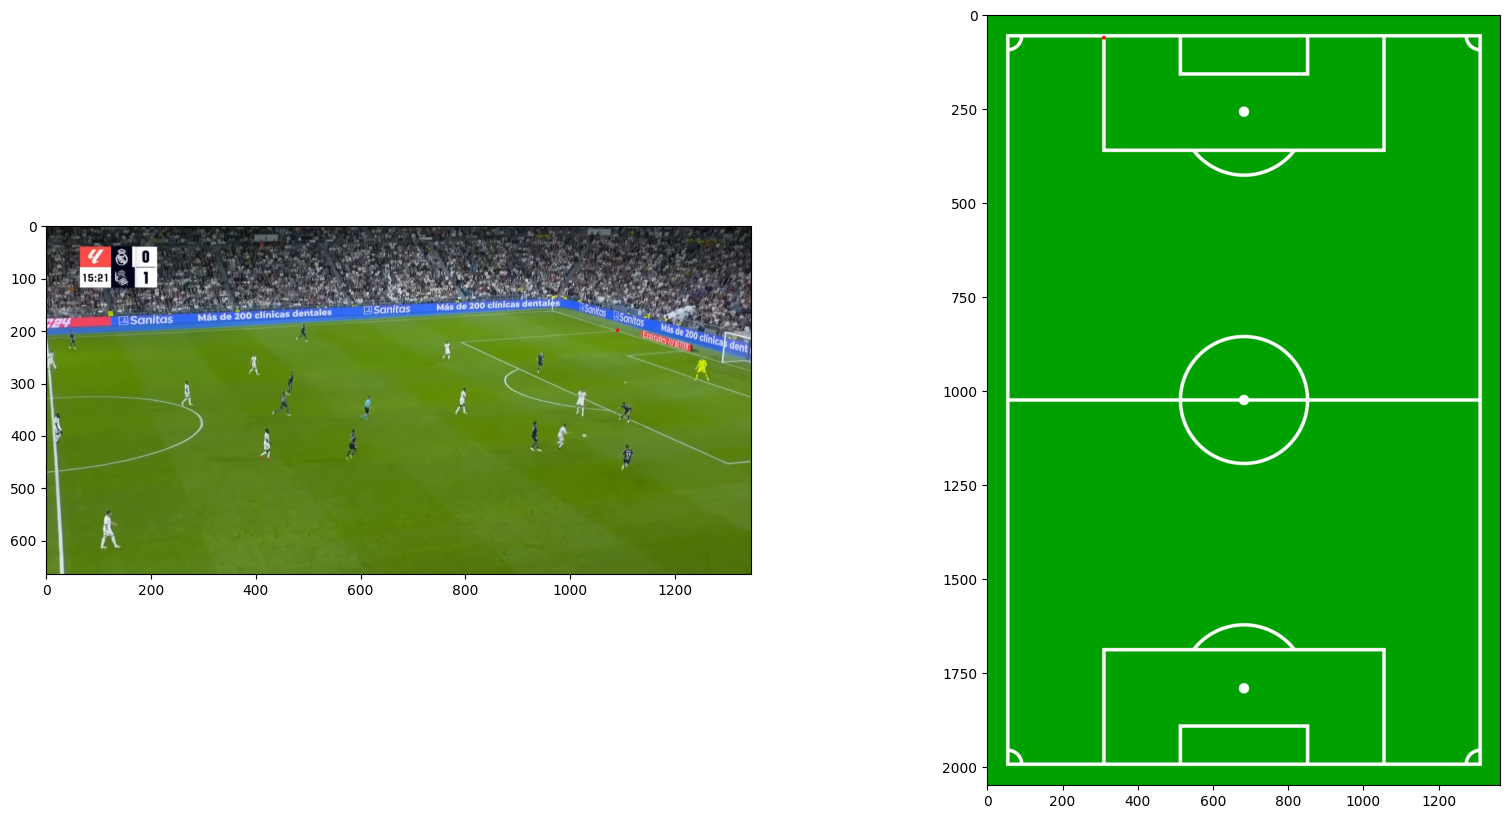

In [6]:
corner3 = img.copy()
corner3 = cv2.circle(corner3, P2, 3, (255, 0, 0), -1)

corner3_2d = field.copy()
corner3_2d = cv2.circle(corner3_2d,P2_2D,  5, (255, 0, 0), -1)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(corner3)
ax[1].imshow(corner3_2d)

In [7]:
P3 = (965,165)
P3_2D = (60, 60)

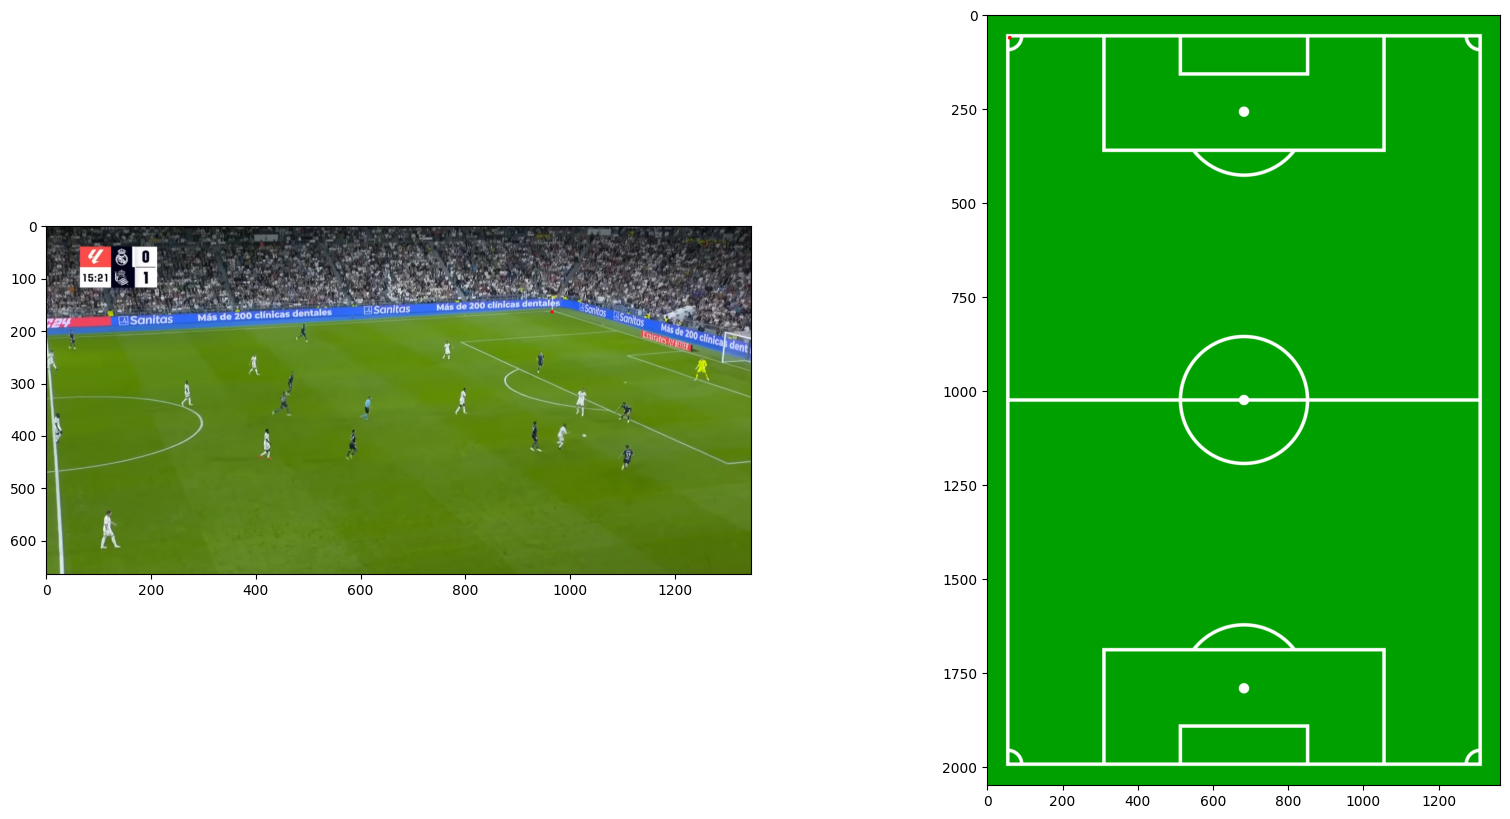

In [8]:
corner4 = img.copy()
corner4 = cv2.circle(corner4, P3, 3, (255, 0, 0), -1)

corner4_2d = field.copy()
corner4_2d = cv2.circle(corner4_2d,P3_2D,  5, (255, 0, 0), -1)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(corner4)
ax[1].imshow(corner4_2d)

In [9]:
P4 = (0,220)
P4_2D = (60, 1010)

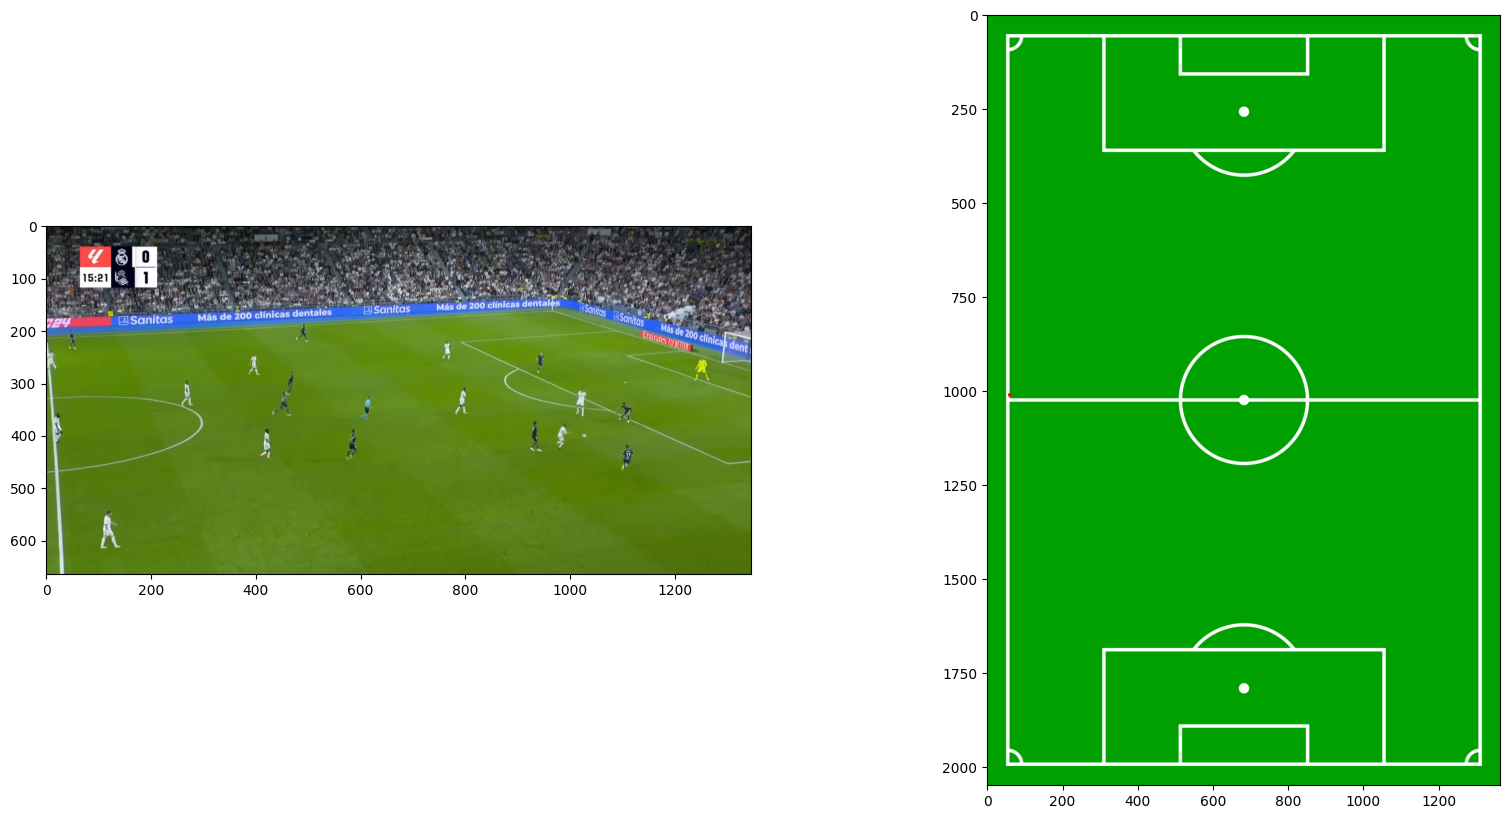

In [10]:
corner5 = img.copy()
corner5 = cv2.circle(corner5, P4, 3, (255, 0, 0), -1)

corner5_2d = field.copy()
corner5_2d = cv2.circle(corner5_2d,P4_2D,  5, (255, 0, 0), -1)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(corner5)
ax[1].imshow(corner5_2d)

In [11]:
P5 = (300,370)
P5_2D = (680, 850)

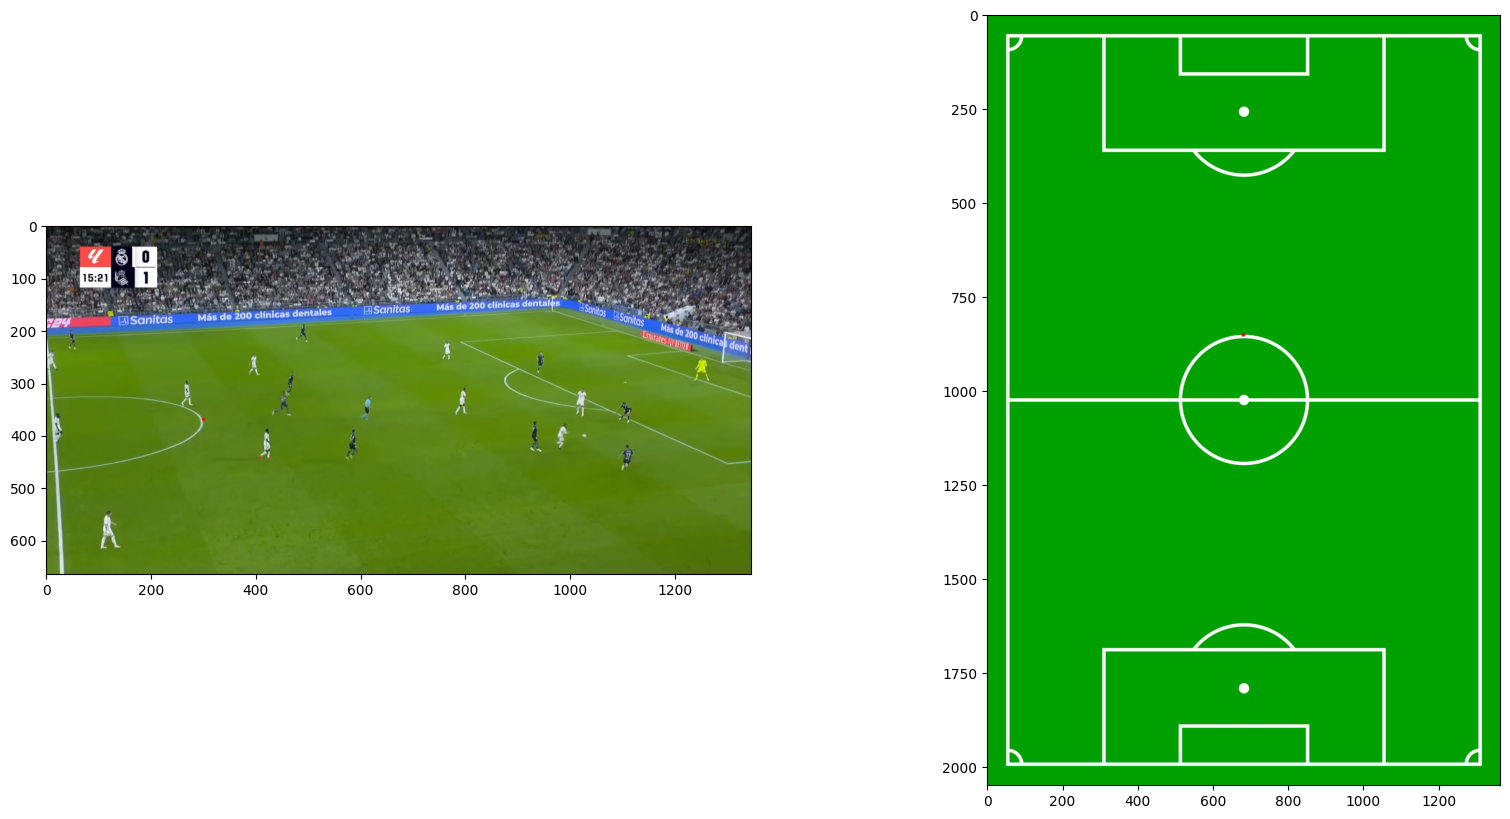

In [12]:
corner5 = img.copy()
corner5 = cv2.circle(corner5, P5, 3, (255, 0, 0), -1)

corner5_2d = field.copy()
corner5_2d = cv2.circle(corner5_2d,P5_2D,  5, (255, 0, 0), -1)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(corner5)
ax[1].imshow(corner5_2d)

## Find homography

In [13]:
src_pts = np.array([P1,P2,P3,P4,P5]).reshape(-1,2)
dst_pts = np.array([P1_2D,P2_2D,P3_2D,P4_2D,P5_2D]).reshape(-1,2)

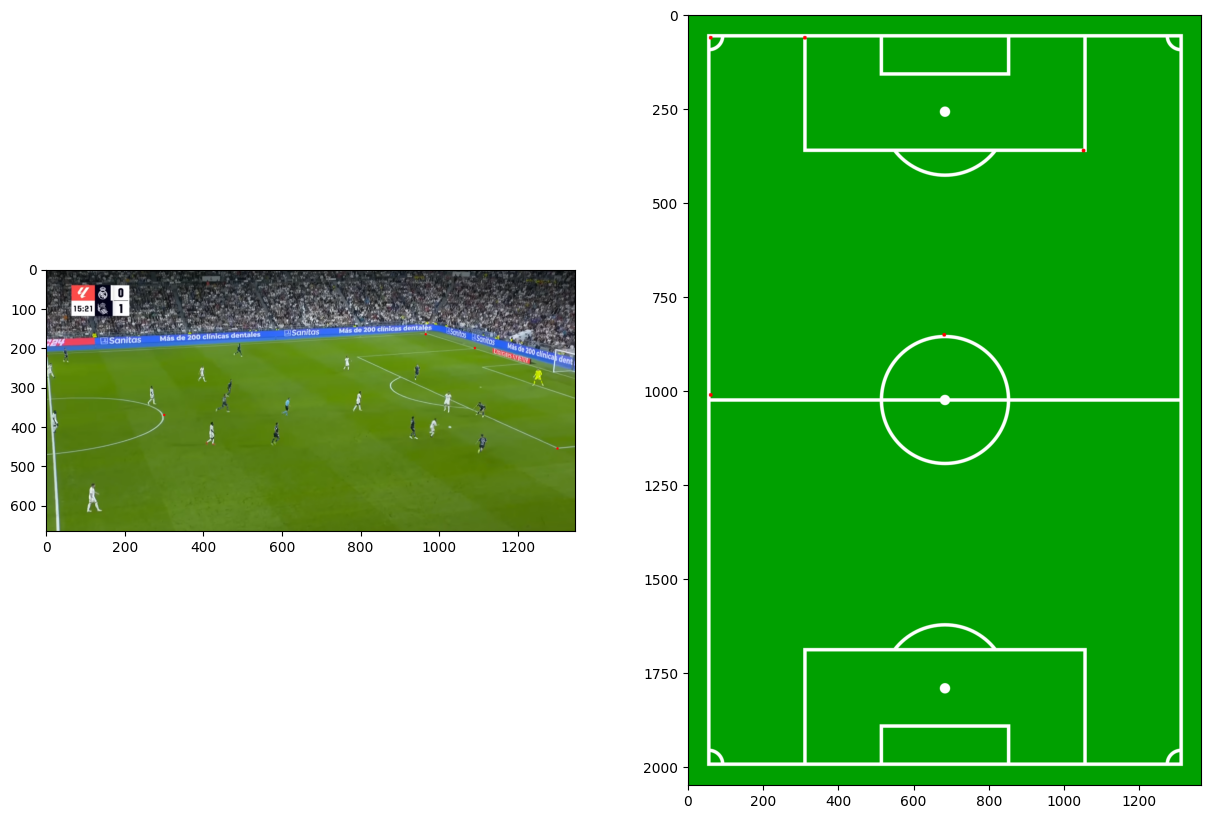

In [14]:
points = img.copy()
points_2d = field.copy()

for src,dst in zip(src_pts,dst_pts):
    points = cv2.circle(points, tuple(src), 3, (255, 0, 0), -1)
    points_2d = cv2.circle(points_2d, tuple(dst), 5, (255, 0, 0), -1)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(points)
ax[1].imshow(points_2d)

In [15]:
H, status = cv2.findHomography(src_pts, dst_pts)
print(H)
print(status)

[[ 7.71285348e-01  1.37385797e+01 -2.86998831e+03]
 [-2.12455959e+00  7.23882303e+00  9.93255504e+02]
 [-3.20444446e-05  7.04999237e-03  1.00000000e+00]]
[[1]
 [1]
 [1]
 [1]
 [1]]


## Warp perspective

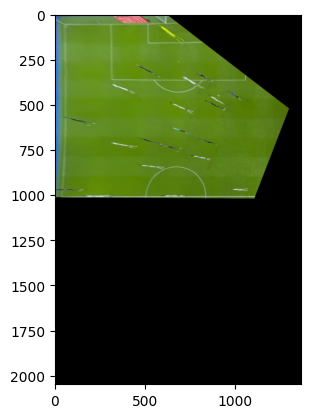

In [16]:
im_out = cv2.warpPerspective(img, H, (field.shape[1],field.shape[0]))
plt.imshow(im_out)

# Find homography of new point

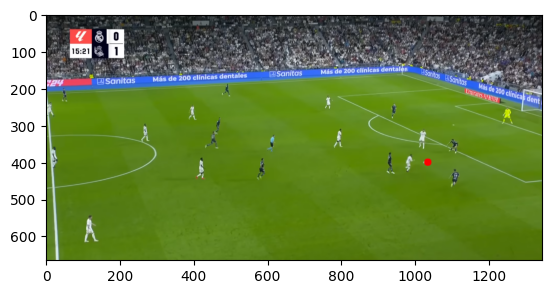

In [17]:
BALL = (1035, 400)
ball = img.copy()
ball = cv2.circle(ball, BALL, 10, (255, 0, 0), -1)
plt.imshow(ball)

In [18]:
src_pts = np.array([P1,P2,P3,P4], np.float32).reshape(-1,2)
dst_pts = np.array([P1_2D,P2_2D,P3_2D,P4_2D],np.float32).reshape(-1,2)

In [25]:
src_pts

array([[1300.,  455.],
       [1090.,  200.],
       [ 965.,  165.],
       [   0.,  220.]], dtype=float32)

In [19]:
M =  cv2.getPerspectiveTransform(src_pts,dst_pts)

In [24]:
M

array([[ 1.37470674e+00,  2.45361983e+01, -5.16508713e+03],
       [-3.15366320e+00,  1.21240894e+01,  1.25278782e+03],
       [ 3.50953699e-04,  1.30967034e-02,  1.00000000e+00]])

In [20]:
# convert the ball points to 2d 
ball_pts = np.array([BALL],np.float32).reshape(-1,1,2)
ball_pts_2d = cv2.perspectiveTransform(ball_pts,M)
ball_pts_2d = ball_pts_2d.astype(int)

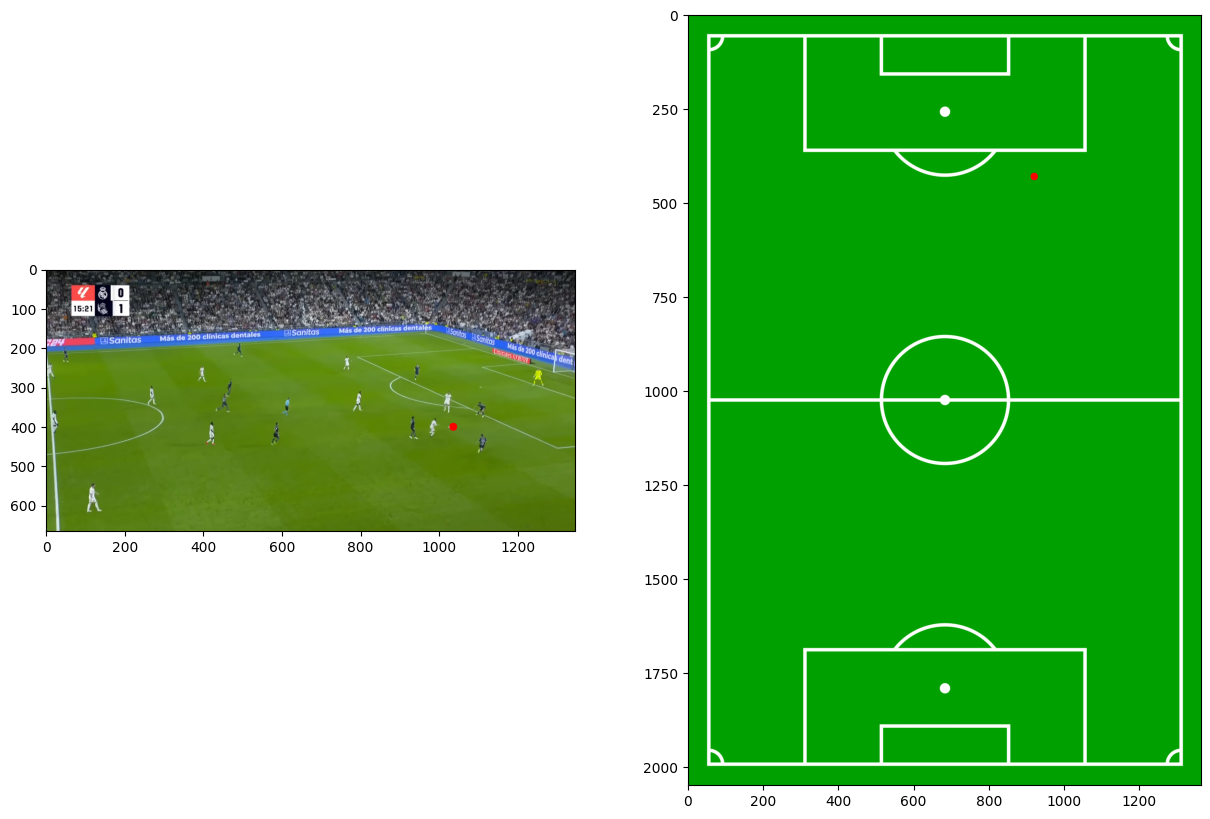

In [21]:
ball_2d = field.copy()
ball_2d = cv2.circle(ball_2d, tuple(ball_pts_2d[0][0]), 10, (255, 0, 0), -1)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(ball)
ax[1].imshow(ball_2d)
